In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [430]:
# Find min index:

def run(df, counts_1):
    
    min_count_1 = counts_1[-1]

    indices_of_min_count_1 = counts_1[counts_1 == min_count_1].index[0]

    # Create masks:

    mask_1 = df[' [1st Choice]'] == indices_of_min_count_1

    mask_2 = df[' [2nd Choice]'] == indices_of_min_count_1

    mask_3 = df[' [3rd Choice]'] == indices_of_min_count_1

    mask_4 = df[' [4th Choice]'] == indices_of_min_count_1

    mask_5 = df[' [5th Choice]'] == indices_of_min_count_1

    # Create shifted dataframes:

    df_1 = df[mask_1].shift(-1, axis = 1)

    df_2 = df[mask_2][[' [2nd Choice]', ' [3rd Choice]', ' [4th Choice]', ' [5th Choice]']].shift(-1, axis = 1)

    df_2[' [1st Choice]'] = df[mask_2][' [1st Choice]']

    df_3 = df[mask_3][[' [3rd Choice]', ' [4th Choice]', ' [5th Choice]']].shift(-1, axis = 1)

    df_3[' [1st Choice]'] = df[mask_3][' [1st Choice]']

    df_3[' [2nd Choice]'] = df[mask_3][' [2nd Choice]']

    df_4 = df[mask_4][[' [4th Choice]', ' [5th Choice]']].shift(-1, axis = 1)

    df_4[' [1st Choice]'] = df[mask_4][' [1st Choice]']

    df_4[' [2nd Choice]'] = df[mask_4][' [2nd Choice]']

    df_4[' [3rd Choice]'] = df[mask_4][' [3rd Choice]']

    df_5 = df[mask_5][[' [5th Choice]']].shift(-1, axis = 1)

    df_5[' [1st Choice]'] = df[mask_5][' [1st Choice]']

    df_5[' [2nd Choice]'] = df[mask_5][' [2nd Choice]']

    df_5[' [3rd Choice]'] = df[mask_5][' [3rd Choice]']

    df_5[' [4th Choice]'] = df[mask_5][' [4th Choice]']

    df_new_1 = pd.concat([df_1, df_2, df_3, df_4, df_5])
    
    return df_new_1, indices_of_min_count_1, min_count_1


In [434]:
def PVoting(df):
    
#     Initialisation:
    percent = 0
    
    while percent < .5:
        
        counts_1 = df[' [1st Choice]'].value_counts()
        
        # Plotting
        plt.figure(figsize=(10, 6))
        counts_1.plot(kind='bar', color='skyblue')

        # Add title and labels
        plt.title('Musical Preference', fontsize=16)
        plt.xlabel('Musicals', fontsize=14)
        plt.ylabel('Number of Votes', fontsize=14)

        # Set the font size of the x and y ticks
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)

        # Show the plot
        plt.tight_layout()
        plt.show()

        percent = np.max(counts_1)/np.sum(counts_1)

        df, indices_of_min_count, min_count = run(df, counts_1)
        
        print(f"We eliminate {indices_of_min_count} as it had {min_count} votes")
        
    else:
        print(f"We have found a winner: {counts_1.index[0]}")
        
    

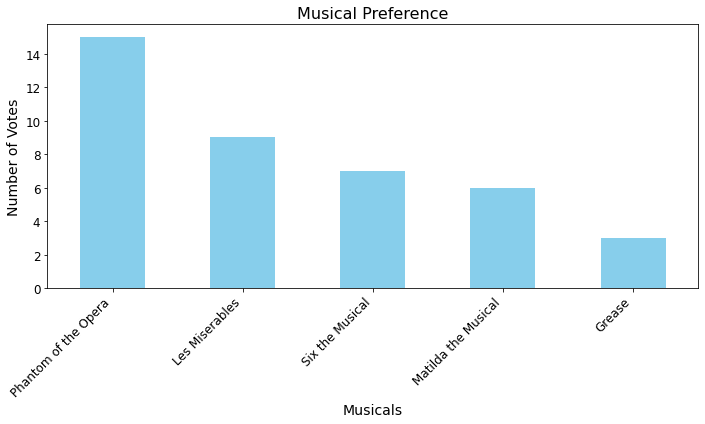

We eliminate Grease as it had 3 votes


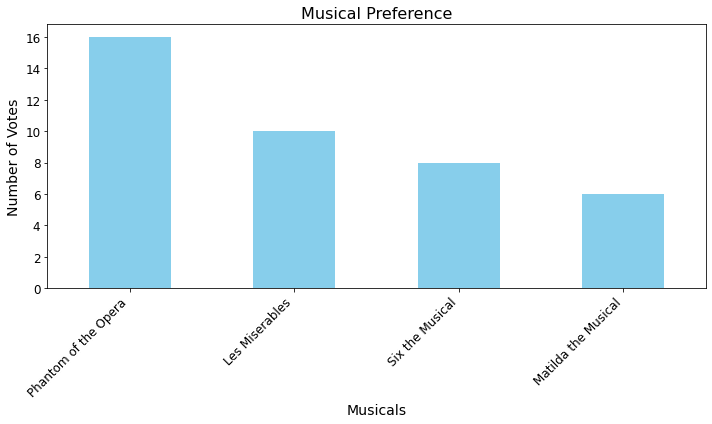

We eliminate Matilda the Musical as it had 6 votes


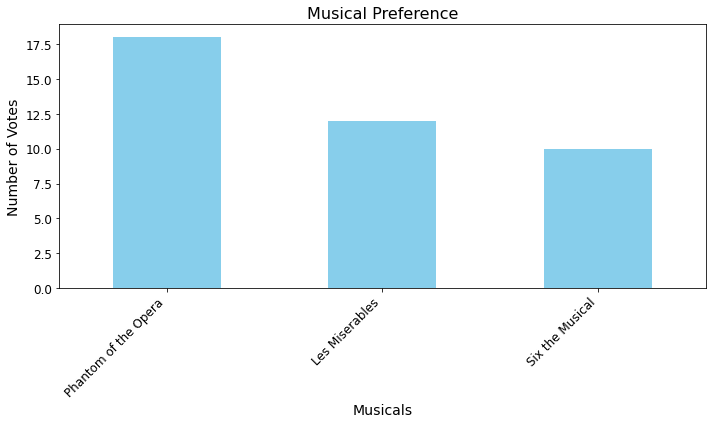

We eliminate Six the Musical as it had 10 votes


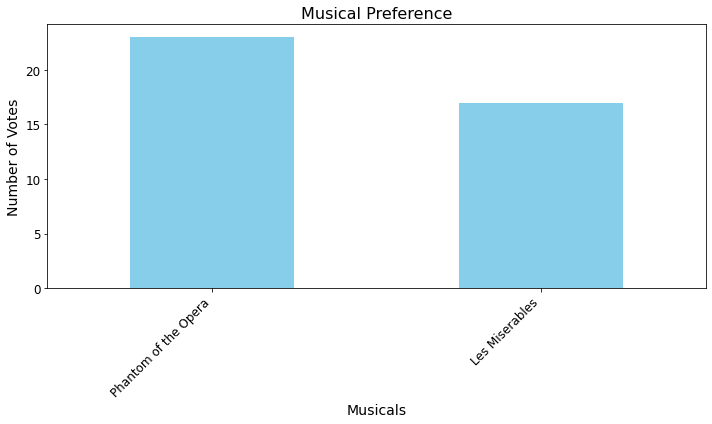

We eliminate Les Miserables as it had 17 votes
We have found a winner: Phantom of the Opera


In [435]:
df = pd.read_csv('London West End Shows .csv')
df = df.drop(['Timestamp', 'Name: '], axis = 1)

PVoting(df)